<a href="https://colab.research.google.com/github/songwoojin04/machine2/blob/main/5week/DL_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

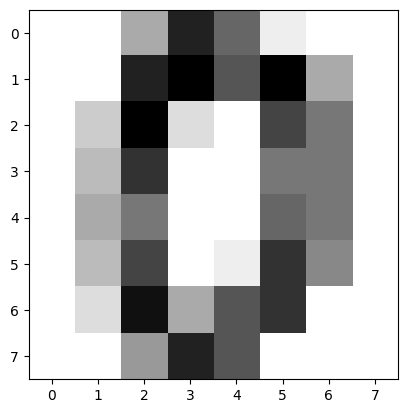

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, metrics

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [ ]:
y = to_categorical(digits.target, num_classes=10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = models.Sequential()
model.add(layers.Input(shape=(64,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
N_EPOCHS = 20
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=N_EPOCHS,
    batch_size=32,
    validation_data=(X_test, y_test)
)

y_pred = model.predict(X_test)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2208 - loss: 2.2675 - val_accuracy: 0.6778 - val_loss: 1.5278
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7417 - loss: 1.2306 - val_accuracy: 0.8417 - val_loss: 0.7413
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9013 - loss: 0.5606 - val_accuracy: 0.9000 - val_loss: 0.4290
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9403 - loss: 0.2898 - val_accuracy: 0.9194 - val_loss: 0.2997
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9633 - loss: 0.1922 - val_accuracy: 0.9361 - val_loss: 0.2392
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9615 - loss: 0.1545 - val_accuracy: 0.9389 - val_loss: 0.2092
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9793 - loss: 0.1143 - val_accuracy: 0.9417 - val_loss: 0.1904
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9811 - loss: 0.0892 - val_accuracy: 0.9444 - val_loss:

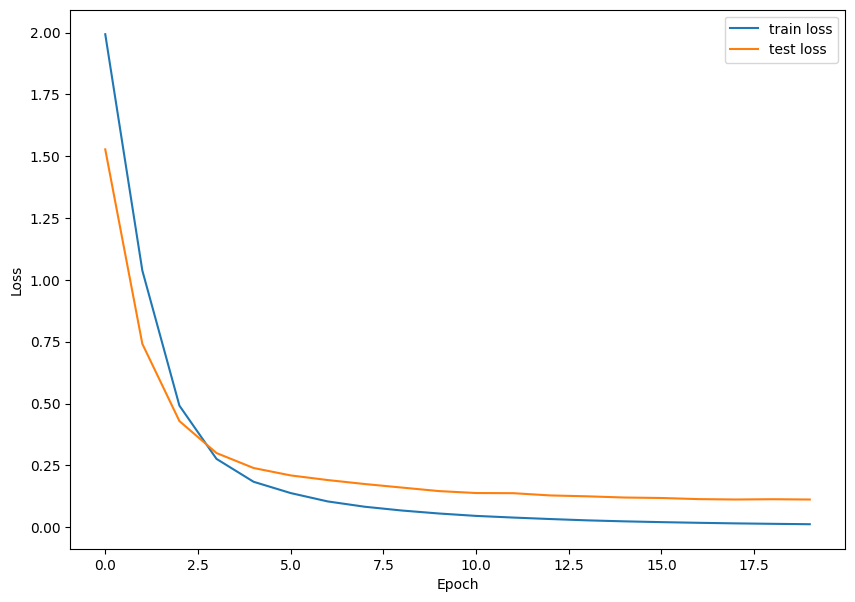

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

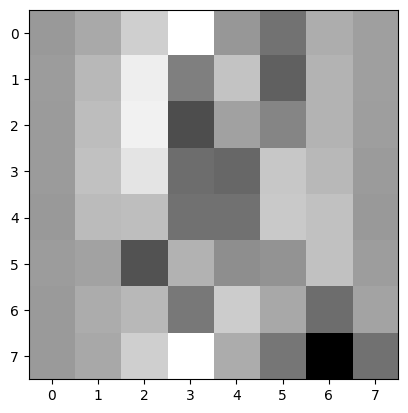

8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Neural Network Prediction: 8


In [ ]:
plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

print(y_test[10])

y_pred_nn = model.predict(X_test[10].reshape(1, -1))
print("Neural Network Prediction:", np.argmax(y_pred_nn))